In [1]:
import numpy as np

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

A neuron is a singular unit in a neural network. It calculates an output value based on the weights and the activation function.

A layer is a group of neurons that get the same input values and calculate output values based on the same algorithm (but with varying weights)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_train.dtype)
print(y_train.dtype)

(576, 8)
(576,)
float64
float32


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(8,)))
network.add(layers.Dense(2, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])


In [12]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [17]:
network.fit(x_train, train_labels, epochs = 5, batch_size=128)
test_loss, test_acc = network.evaluate(x_test, test_labels)

predictions = network.predict(x_test)

Train on 576 samples
Epoch 1/5
576/576 [==============================] - 0s 123us/sample - loss: 0.4689 - accuracy: 0.7726
Epoch 2/5
576/576 [==============================] - 0s 105us/sample - loss: 0.4619 - accuracy: 0.7760
Epoch 3/5
576/576 [==============================] - 0s 59us/sample - loss: 0.4566 - accuracy: 0.7778
Epoch 4/5
576/576 [==============================] - 0s 52us/sample - loss: 0.4556 - accuracy: 0.7830
Epoch 5/5
576/576 [==============================] - 0s 44us/sample - loss: 0.4526 - accuracy: 0.7760
192/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
test_acc

0.8020833

In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(np.argmax(test_labels,axis=1), np.argmax(predictions,axis=1))
print(confusion)

[[119  11]
 [ 27  35]]


In [182]:
network2 = models.Sequential()
network2.add(layers.Dense(12, activation='relu', input_shape=(8,)))

network2.add(layers.Dense(9, activation='relu', input_shape=(8,)))
network2.add(layers.Dense(9, activation='relu', input_shape=(8,)))

network2.add(layers.Dense(2, activation='softmax'))

network2.compile(optimizer='rmsprop', loss='binary_crossentropy',
                metrics=['accuracy'])

In [183]:
history2 = network2.fit(x_train, train_labels, epochs = 50, batch_size=128)
training_loss2 = history2.history['loss']

Train on 576 samples
Epoch 1/50
576/576 [==============================] - 2s 3ms/sample - loss: 0.7017 - accuracy: 0.5156
Epoch 2/50
576/576 [==============================] - 0s 53us/sample - loss: 0.6724 - accuracy: 0.5868
Epoch 3/50
576/576 [==============================] - 0s 40us/sample - loss: 0.6531 - accuracy: 0.6493
Epoch 4/50
576/576 [==============================] - 0s 33us/sample - loss: 0.6377 - accuracy: 0.6788
Epoch 5/50
576/576 [==============================] - 0s 33us/sample - loss: 0.6239 - accuracy: 0.7049
Epoch 6/50
576/576 [==============================] - 0s 32us/sample - loss: 0.6120 - accuracy: 0.7135
Epoch 7/50
576/576 [==============================] - 0s 60us/sample - loss: 0.6017 - accuracy: 0.7153
Epoch 8/50
576/576 [==============================] - 0s 48us/sample - loss: 0.5915 - accuracy: 0.7188
Epoch 9/50
576/576 [==============================] - 0s 58us/sample - loss: 0.5821 - accuracy: 0.7257
Epoch 10/50
576/576 [==============================] 

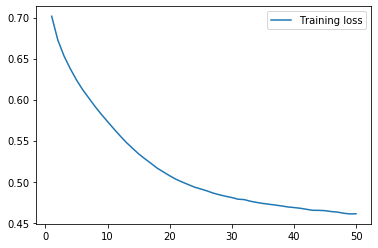

In [184]:
import matplotlib.pyplot as plt

epochs = range(1, len(training_loss2) +1)
plt.plot(epochs, training_loss2, label='Training loss')
plt.legend()


In [185]:
from sklearn.metrics import confusion_matrix
import numpy as np

predictions2 = network2.predict(x_test)
confusion2 = confusion_matrix(np.argmax(test_labels,axis=1), np.argmax(predictions2,axis=1))
print(confusion2)

[[117  13]
 [ 24  38]]
